## House Price Prediction 

#### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. The company requires us to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know the following things about the prospective properties:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.


Also, to determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal :

To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries and packages
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [3]:
# Importing Dataset
df = pd.read_csv("train.csv")
# Checking the dimensions of the dataframe
df.shape

(1460, 81)

In [4]:
print(df.columns.to_list())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [5]:
# Checking the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Checking missing values
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [7]:
# Looking at the statistical aspects of the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

## Data Cleaning

In [10]:
# Checking the percentage of null values in dataframe
perc_null = df.isnull().sum()/len(df)*100
perc_null.sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [11]:
# Dropping the insignificant columns with more than 40% null values
df=df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
# GarageYrBlt missing value imputation
df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1962.0    21
1958.0    21
1966.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1997.0    19
1960.0    19
1978.0    19
1954.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0     5
1916.0     5
1936.0     5
1945.0     4
1931.0     4
1982.0     4
1928.0     4
1935.0     4
1946.0     4
1921.0     3

In [13]:
# Handling the missing value in the GarageYrBlt
df.GarageYrBlt.fillna(df.GarageYrBlt.median(),inplace=True)

In [14]:
# GarageCond missing value imputation
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [15]:
# Handling the missing value in the GarageCond
df.GarageCond.fillna(df.GarageCond.mode()[0],inplace=True)

In [16]:
# GarageType missing value imputation
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [17]:
# Handling the missing value in the GarageType
df.GarageType.fillna(df.GarageType.mode()[0],inplace=True)

In [18]:
# GarageFinish missing value imputation
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [19]:
# Handling the missing value in the GarageFinish
df.GarageFinish.fillna(df.GarageFinish.mode()[0],inplace=True)

In [20]:
# GarageQual missing value imputation
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [21]:
# Handling the missing value in the GarageQual
df.GarageQual.fillna(df.GarageQual.mode()[0],inplace=True)

In [22]:
# BsmtFinType2 missing value imputation
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [23]:
# Handling the missing value in the BsmtFinType2
df.BsmtFinType2.fillna(df.BsmtFinType2.mode()[0],inplace=True)

In [24]:
# BsmtExposure missing value imputation
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [25]:
# Handling the missing value in the BsmtExposure
df.BsmtExposure.fillna(df.BsmtExposure.mode()[0],inplace=True)

In [26]:
# BsmtQual missing value imputation
df.BsmtQual.value_counts()       

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [27]:
# Handling the missing value in the BsmtQual
df.BsmtQual.fillna(df.BsmtQual.mode()[0],inplace=True)

In [28]:
# BsmtCond missing value imputation 
df.BsmtCond.value_counts() 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [29]:
# Handling the missing value in the BsmtCond
df.BsmtCond.fillna(df.BsmtCond.mode()[0],inplace=True)

In [30]:
# BsmtFinType1 missing value imputation     
df.BsmtFinType1.value_counts() 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [31]:
# Handling the missing value in the BsmtFinType1
df.BsmtFinType1.fillna(df.BsmtFinType1.mode()[0],inplace=True)

In [32]:
# MasVnrArea missing value imputation  
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

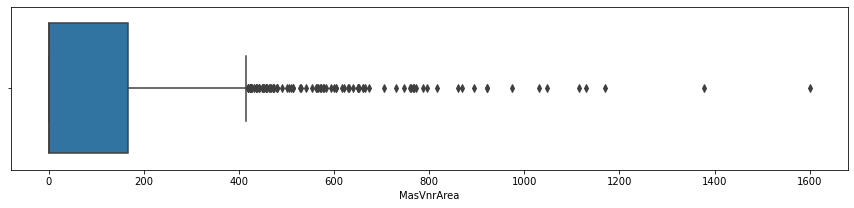

In [33]:
#boxplot of MasVnrArea
plt.figure(figsize=[15,3])
sns.boxplot(df.MasVnrArea)
plt.show()

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

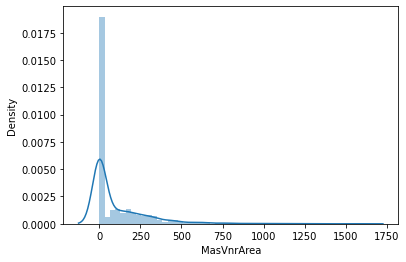

In [34]:
#Checking distribution of MasVnrArea
sns.distplot(df.MasVnrArea)

In [35]:
# Handling the missing value in the MasVnrArea
df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)

In [36]:
# MasVnrType missing value imputation
df.MasVnrType.value_counts()        


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [37]:
# Handling the missing value in the MasVnrType
df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)

In [38]:
# Electrical missing value imputation
df.Electrical.value_counts() 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [39]:
# Handling the missing value in the Electrical
df.Electrical.fillna(df.Electrical.mode()[0],inplace=True)

In [40]:
# LotFrontage missing value imputation  
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

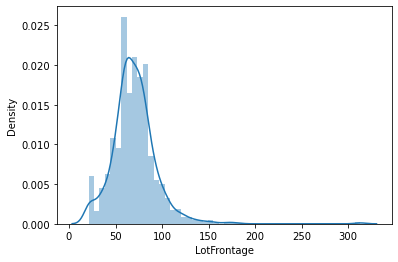

In [41]:
#Checking distribution of LotFrontage
sns.distplot(df.LotFrontage)

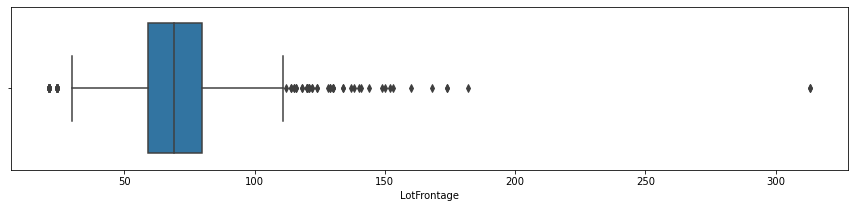

In [42]:
#boxplot of LotFrontage
plt.figure(figsize=[15,3])
sns.boxplot(df.LotFrontage)
plt.show()

In [43]:
# Handling the missing value in the LotFrontage, filling with "None"
df.LotFrontage.fillna("None",inplace=True)

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Doing Feature Engineering by deriving new features from existing variables

In [45]:
#Converting the Year of built into age of house
df["YearOld"] = df["YrSold"]-df["YearBuilt"]

In [46]:
#Converting the Year of Garage built into age of Garage
df["GarageYearOld"] = df["YrSold"]-df["GarageYrBlt"]

In [47]:
#Converting the Year of Remodelling into age of Remodelling
df["RemodellingYearOld"] = df["YrSold"]-df["YearRemodAdd"]

In [48]:
#Changing MoSold to Categorical
import calendar

df['MonthSold'] = df['MoSold'].apply(lambda x: calendar.month_name[x])

In [49]:
#Dropping the Built year and Sold year columns
df=df.drop(["MoSold","YrSold","YearBuilt","GarageYrBlt","YearRemodAdd"], axis=1)

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearOld,GarageYearOld,RemodellingYearOld,MonthSold
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,5,5.0,5,February
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31,31.0,31,May
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,7,7.0,6,September
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91,8.0,36,February
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8,8.0,8,December


In [51]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearOld,GarageYearOld,RemodellingYearOld
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945,29.226712,22.950000
std,421.610009,42.300571,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152,24.034844,20.640653
min,1.000000,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,7.000000,4.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,28.000000,14.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000,46.000000,41.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000,107.000000,60.000000


## Univariate Analysis

In [52]:
#Separating the numerical columns for skewness checking
num_cols = df.describe().columns.to_list()
num_cols = num_cols[1:]
num_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'YearOld',
 'GarageYearOld',
 'RemodellingYearOld']

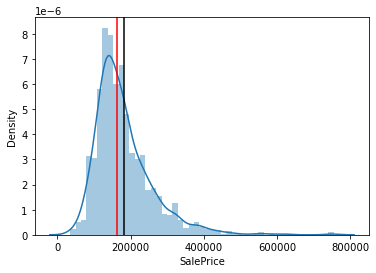

In [53]:
# Checking the skewness of target column SalePrice
sns.distplot(df['SalePrice'])
plt.axvline(df['SalePrice'].mean(), c="black")
plt.axvline(df['SalePrice'].median(), c="red")
plt.show()

In [54]:
# Checking the Skewness and Kurtosis of SalePrice

from scipy import stats
print("Skewness", df["SalePrice"].skew())
print("Kurtosis", df["SalePrice"].kurt())

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


SalePrice column is skewed.

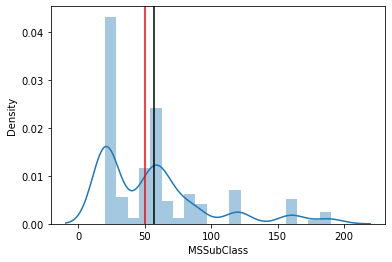

Skewness 1.4076567471495591
Kurtosis 1.5801879649863309


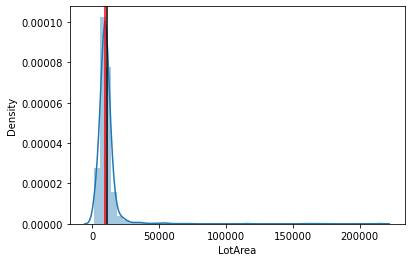

Skewness 12.207687851233496
Kurtosis 203.24327101886033


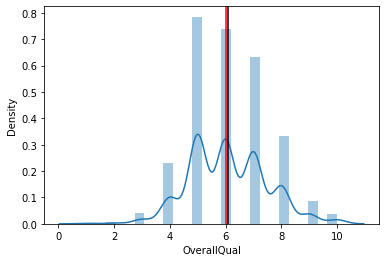

Skewness 0.2169439277628693
Kurtosis 0.09629277835615113


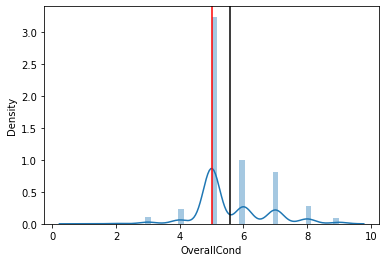

Skewness 0.6930674724842182
Kurtosis 1.1064134613731684


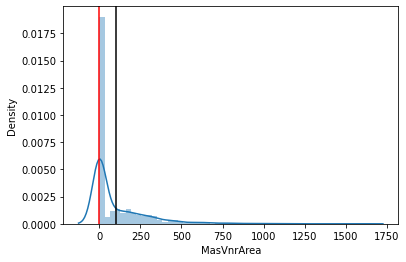

Skewness 2.6776164510820997
Kurtosis 10.141416177298794


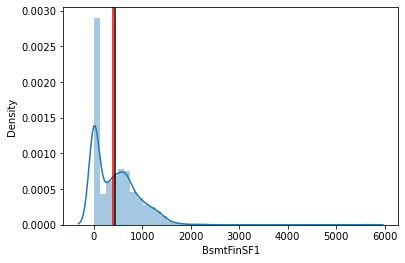

Skewness 1.685503071910789
Kurtosis 11.118236291964712


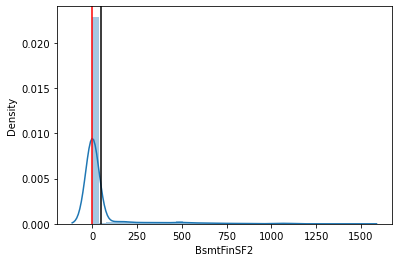

Skewness 4.255261108933303
Kurtosis 20.11333754558646


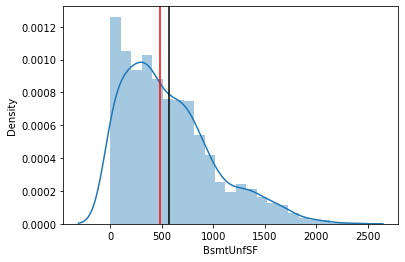

Skewness 0.9202684528039037
Kurtosis 0.47499398780908475


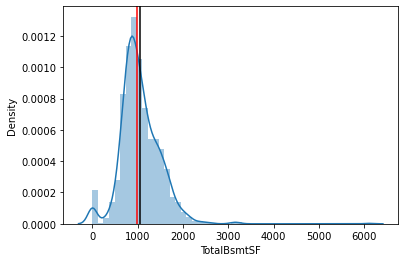

Skewness 1.5242545490627664
Kurtosis 13.250483281984796


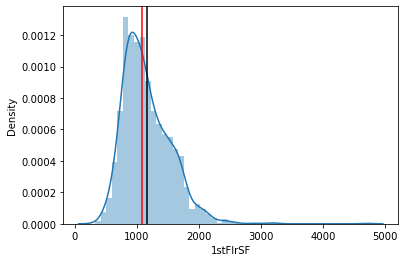

Skewness 1.3767566220336365
Kurtosis 5.74584148244079


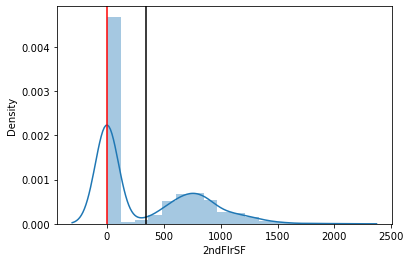

Skewness 0.8130298163023265
Kurtosis -0.5534635576075795


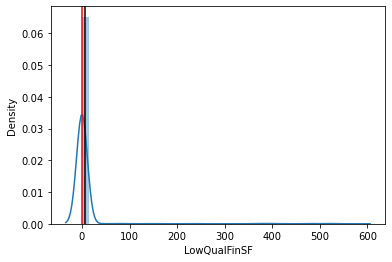

Skewness 9.011341288465387
Kurtosis 83.2348166744174


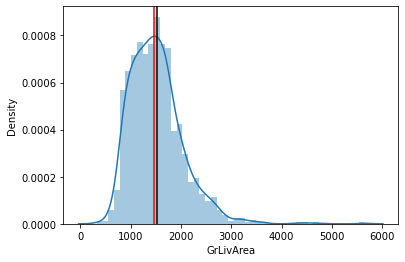

Skewness 1.3665603560164552
Kurtosis 4.895120580693174


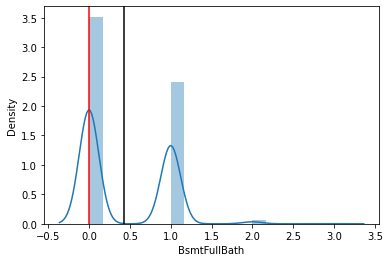

Skewness 0.596066609663168
Kurtosis -0.8390982654634271


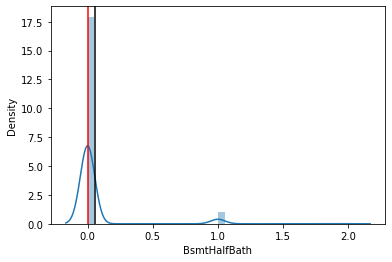

Skewness 4.103402697955168
Kurtosis 16.396641945350446


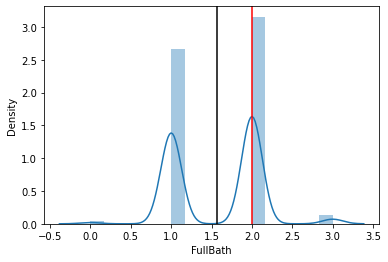

Skewness 0.036561558402727165
Kurtosis -0.8570428212743262


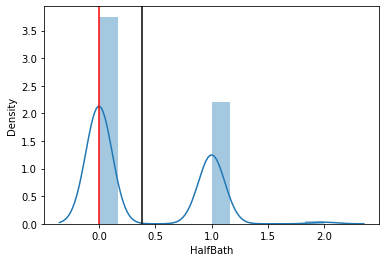

Skewness 0.675897448233722
Kurtosis -1.0769272841476227


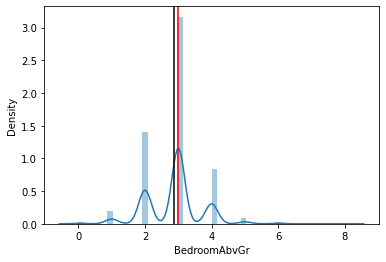

Skewness 0.21179009627507137
Kurtosis 2.230874582191236


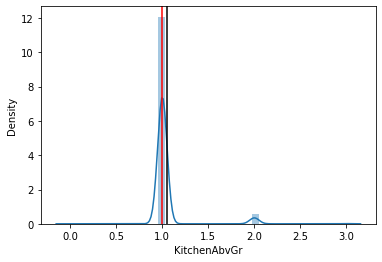

Skewness 4.488396777072859
Kurtosis 21.532403840138784


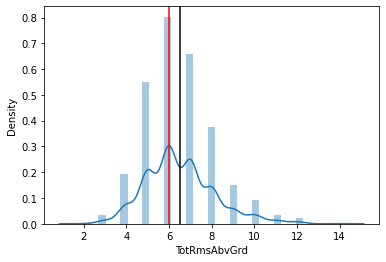

Skewness 0.6763408364355531
Kurtosis 0.8807615657189474


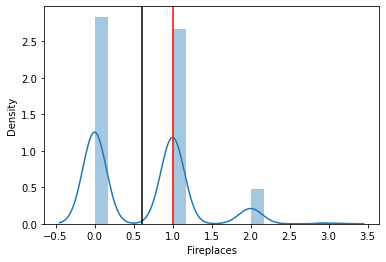

Skewness 0.6495651830548841
Kurtosis -0.21723720752814657


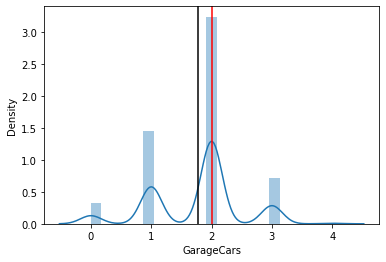

Skewness -0.3425489297486655
Kurtosis 0.22099776396532844


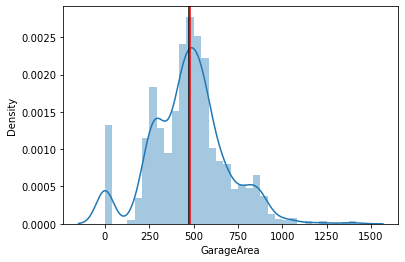

Skewness 0.17998090674623907
Kurtosis 0.9170672022708684


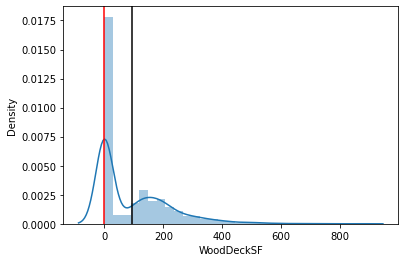

Skewness 1.5413757571931312
Kurtosis 2.992950924703908


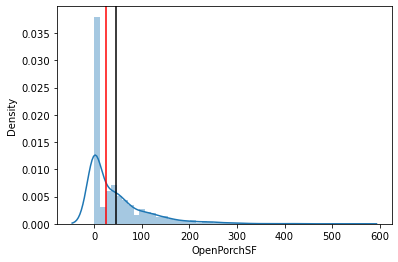

Skewness 2.3643417403694404
Kurtosis 8.490335805910506


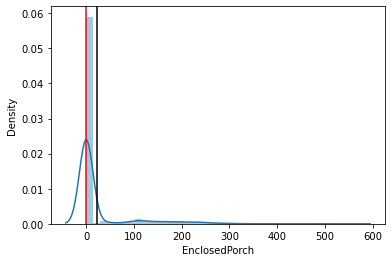

Skewness 3.08987190371177
Kurtosis 10.430765944030428


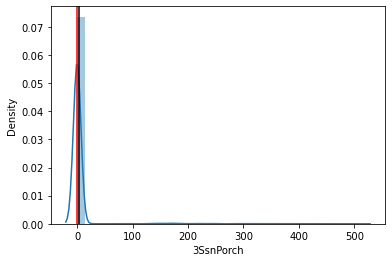

Skewness 10.304342032693112
Kurtosis 123.66237944970538


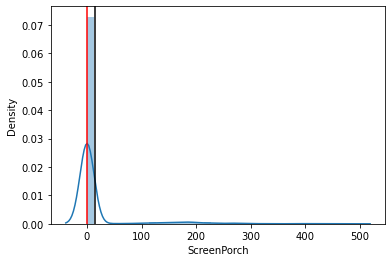

Skewness 4.122213743143115
Kurtosis 18.43906784486968


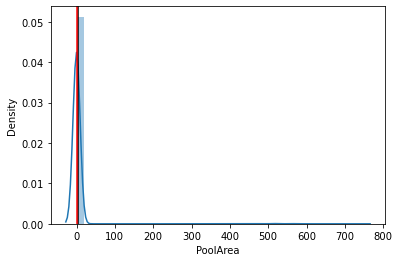

Skewness 14.828373640750588
Kurtosis 223.2684989181717


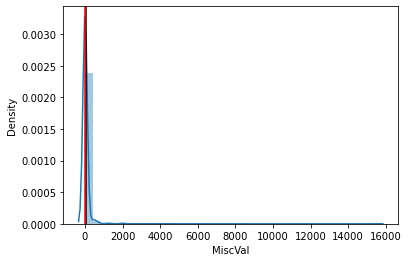

Skewness 24.476794188821916
Kurtosis 701.0033422801193


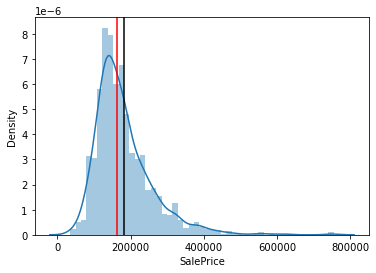

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


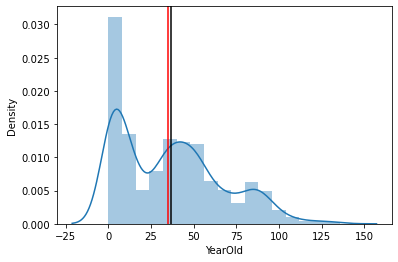

Skewness 0.609030229450241
Kurtosis -0.43682934062758916


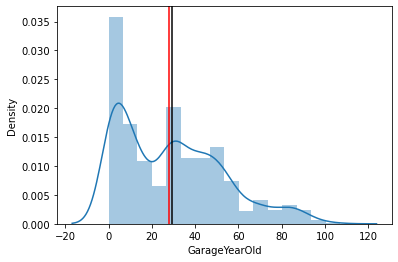

Skewness 0.669168221035795
Kurtosis -0.27249083867863977


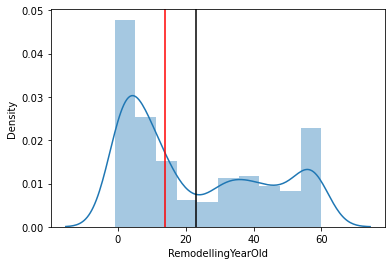

Skewness 0.5024890321999378
Kurtosis -1.2660279973332127


In [55]:
# Checking the Skewness and Kurtosis of all numeric columns
for i in num_cols:
    sns.distplot(df[i])
    plt.axvline(df[i].mean(), c="black")
    plt.axvline(df[i].median(), c="red")
    plt.show()
    print("Skewness",df[i].skew())
    print("Kurtosis",df[i].kurt())
    print("="*70)

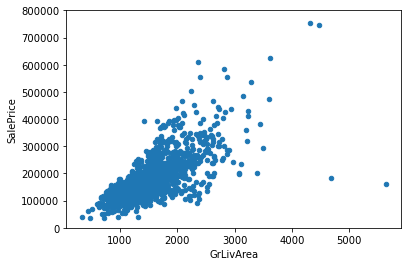

In [56]:
# Checking the SalePrice vs GrLivArea scatter plot

var = "GrLivArea"
data = pd.concat([df['SalePrice'], df[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.show()

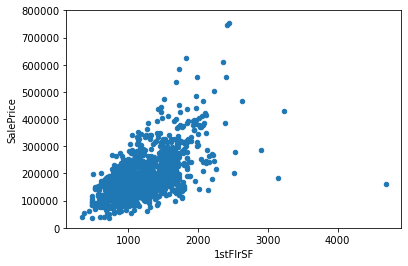

In [57]:
# Checking the SalePrice vs 1stFlrSF scatter plot

var = "1stFlrSF"
data = pd.concat([df['SalePrice'], df[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.show()

SalePrice has a strong positive relation with GrLivArea and 1stFlrSF. But it may be linear or nonlinear

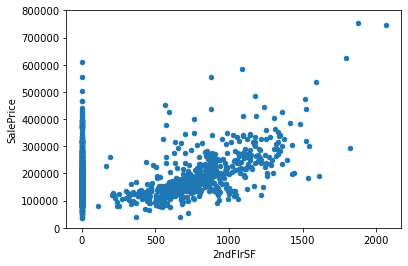

In [58]:
# Checking the SalePrice vs 2ndFlrSF scatter plot

var = "2ndFlrSF"
data = pd.concat([df['SalePrice'], df[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.show()

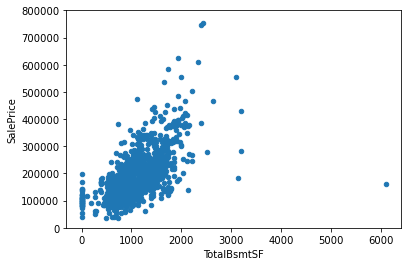

In [59]:
# Checking the SalePrice vs TotalBsmtSF scatter plot

var = "TotalBsmtSF"
data = pd.concat([df['SalePrice'], df[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.show()

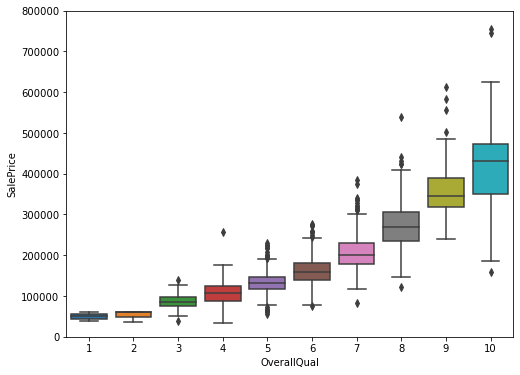

In [60]:
# Plotting boxplot for OverallQual vs SalePrice
var = "OverallQual"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

With the increasing OverallQual rating, the SalePrice increased.

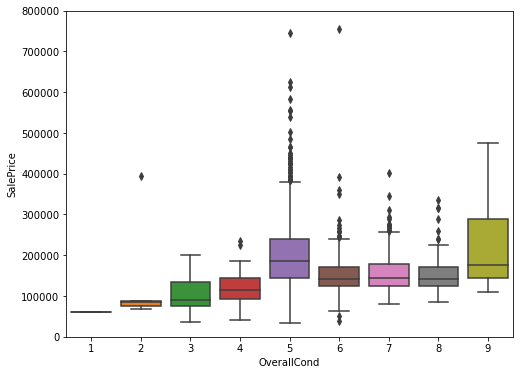

In [61]:
# Plotting boxplot for OverallCond vs SalePrice
var = "OverallCond"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

For 5 to 9 OverallCond rating, the SalePrice moderately higher than that of rating 1 to 4.

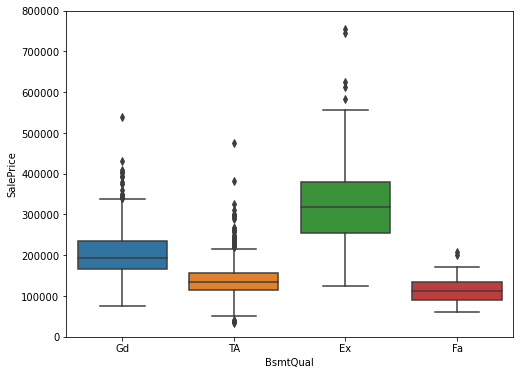

In [62]:
# Plotting boxplot for BsmtQual vs SalePrice
var = "BsmtQual"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

When Basement height greater than 100+ inches, the house SalePrice is higher.

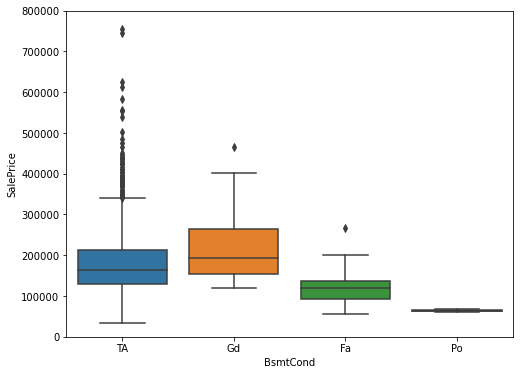

In [63]:
# Plotting boxplot for BsmtCond vs SalePrice
var = "BsmtCond"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

When Basement condition is good, the house SalePrice is higher.

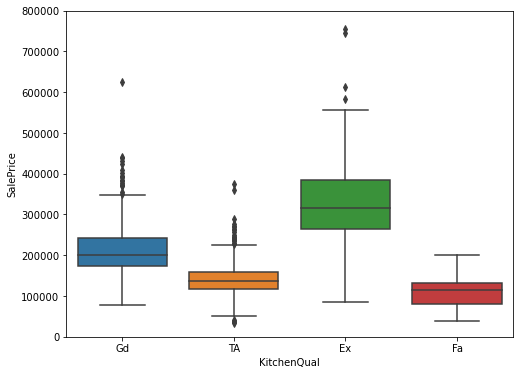

In [64]:
# Plotting boxplot for KitchenQual vs SalePrice
var = "KitchenQual"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

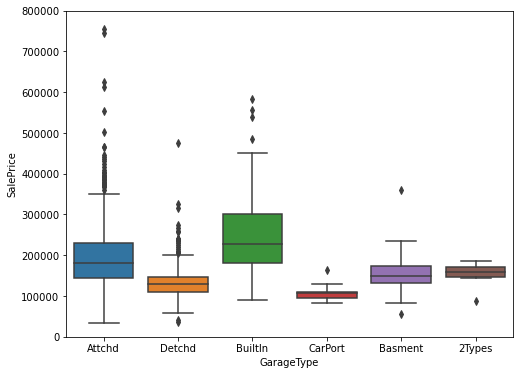

In [65]:
# Plotting boxplot for GarageType vs SalePrice
var = "GarageType"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

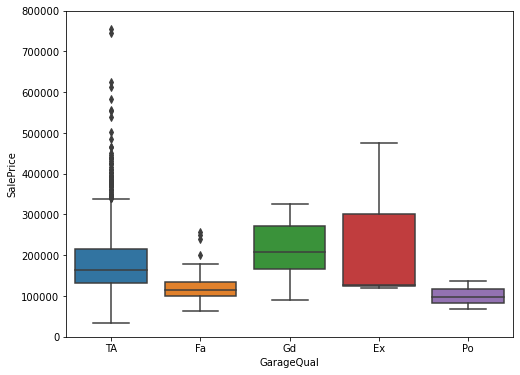

In [66]:
# Plotting boxplot for GarageQual vs SalePrice
var = "GarageQual"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

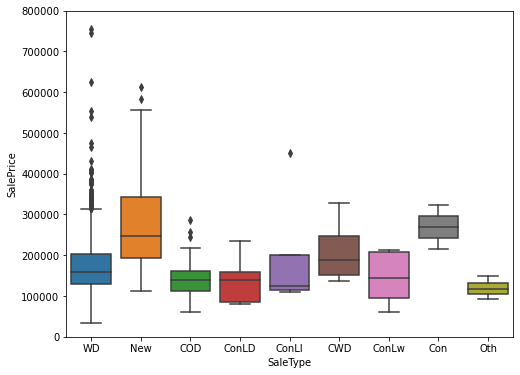

In [67]:
# Plotting boxplot for SaleType vs SalePrice
var = "SaleType"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

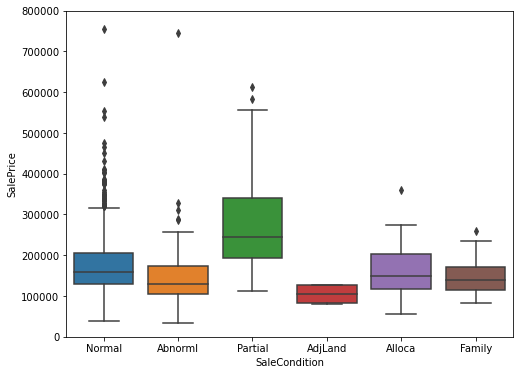

In [68]:
# Plotting boxplot for SaleCondition vs SalePrice
var = "SaleCondition"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

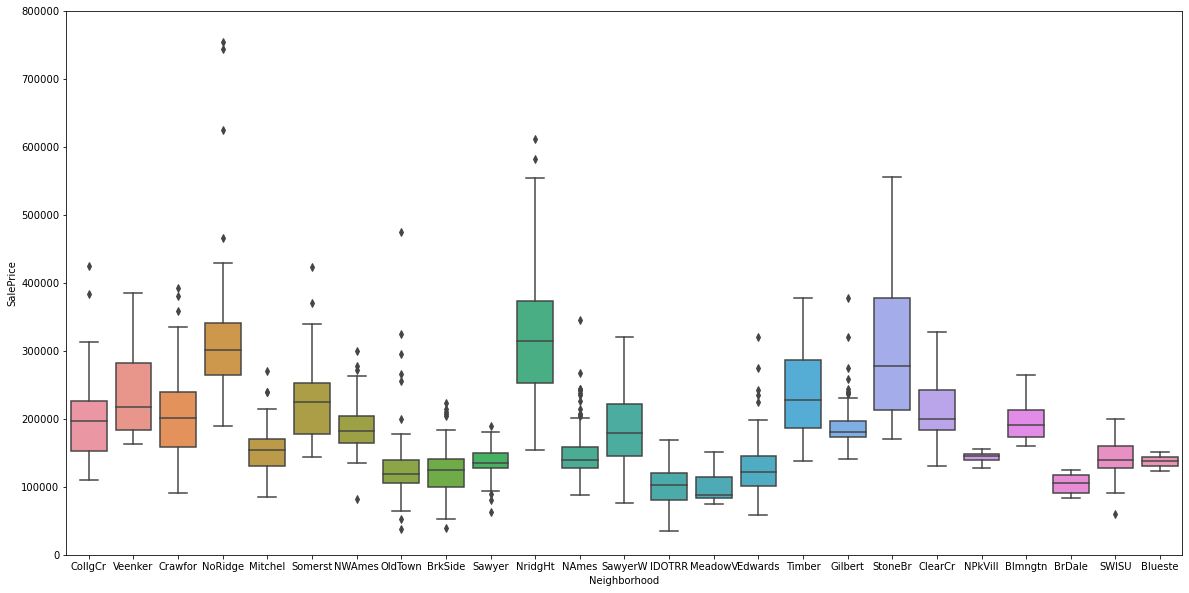

In [69]:
# Plotting boxplot for Neighborhood vs SalePrice
var = "Neighborhood"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.show()

Northridge Heights and StoneBrook neighbourhood has better SalePrice median than most of the other neighbourhoods.

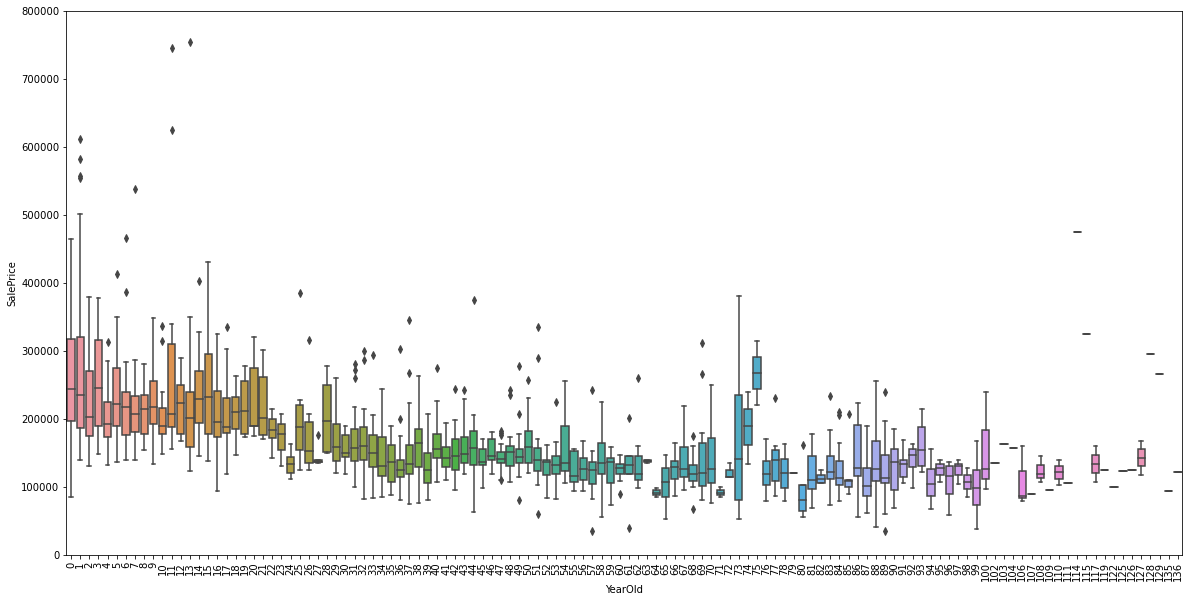

In [70]:
# Plotting boxplot for YearOld vs SalePrice
var = "YearOld"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

With the increasing age of the house, the price dropped gradually except a few houses which are above 100 yrs old.

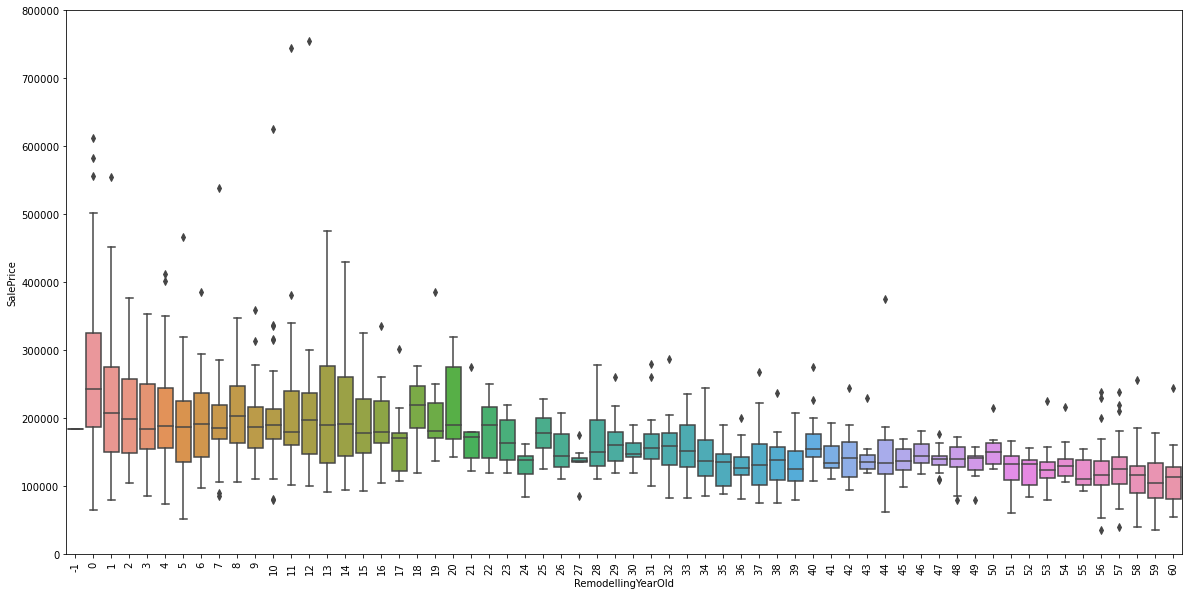

In [71]:
# Plotting boxplot for RemodellingYearOld vs SalePrice
var = "RemodellingYearOld"
data = pd.concat([df['SalePrice'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y='SalePrice', data=df)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

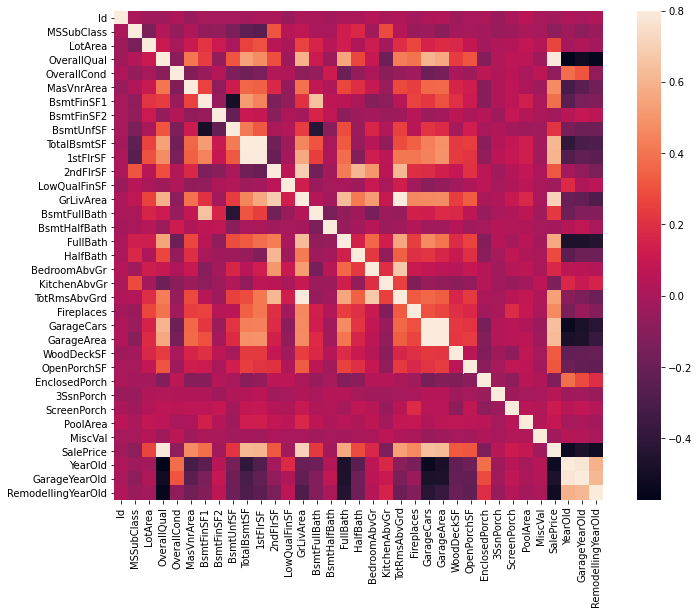

In [72]:
# Checking the correlation between all features by plotting Correlation Matrix

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [73]:
# Checking the top 10 correlations 
k=15
corrmat.nlargest(k, "SalePrice")

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearOld,GarageYearOld,RemodellingYearOld
SalePrice,-0.021917,-0.084284,0.263843,0.790982,-0.077856,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,1.000000,-0.523350,-0.467617,-0.509079
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.572629,-0.514933,-0.552570
GrLivArea,0.008273,0.074853,0.263116,0.593007,-0.079686,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.708624,-0.200302,-0.221474,-0.289805
GarageCars,0.016570,-0.040110,0.154871,0.600671,-0.185758,0.361945,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.131881,-0.020891,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.640409,-0.538727,-0.475728,-0.423236
GarageArea,0.017634,-0.098672,0.180403,0.562022,-0.151521,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.179189,-0.024536,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.623431,-0.479408,-0.469580,-0.373447
TotalBsmtSF,-0.015415,-0.238518,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.391498,-0.309726,-0.292096
1stFlrSF,0.010496,-0.251758,0.299475,0.476224,-0.144203,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.282143,-0.225294,-0.241310
FullBath,0.005587,0.131608,0.126031,0.550600,-0.194149,0.272999,0.058543,-0.076444,0.288886,0.323722,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.469672,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.560664,-0.468403,-0.467162,-0.440413
TotRmsAbvGrd,0.027239,0.040380,0.190015,0.427452,-0.057583,0.279568,0.044316,-0.035227,0.250647,0.285573,0.409516,0.616423,0.131185,0.825489,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.362289,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.533723,-0.096955,-0.141206,-0.194005
MasVnrArea,-0.051071,0.023573,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,-0.311479,-0.244519,-0.177105


In [74]:
#Top 15 Correlations
corrmat.nlargest(k, "SalePrice")["SalePrice"]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

In [75]:
corrmat.nlargest(k, "SalePrice")["SalePrice"].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea',
       'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

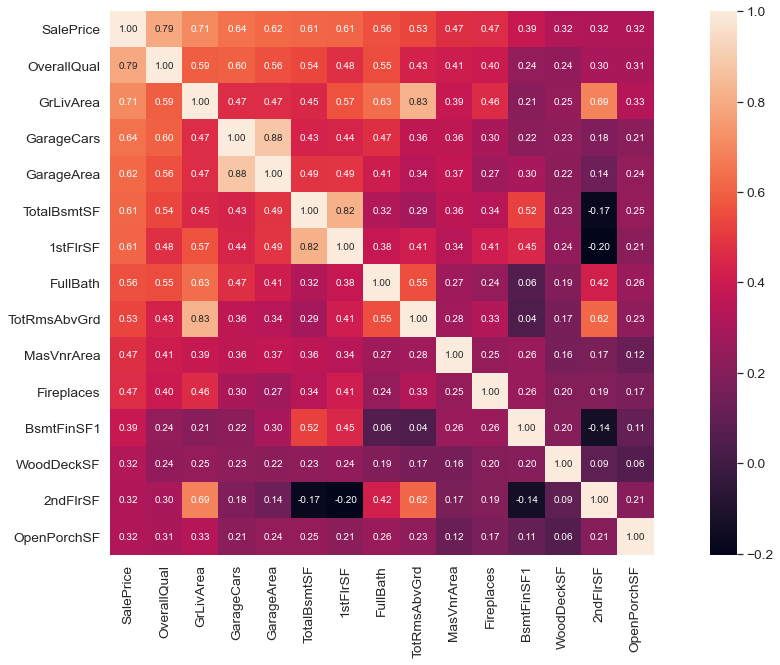

In [76]:
#Checking the multicollinearity between top 15 variables

k = 15
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize = (20,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", 
                 annot_kws={"size":10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

GrLivArea has strong multicollinearity with TotRmsAbvGrd and 2ndFlrSF, GarageArea has strong multicollinearity with GarageCars, 1stFlrSF strong multicollinearity with TotalBsmtSF, 

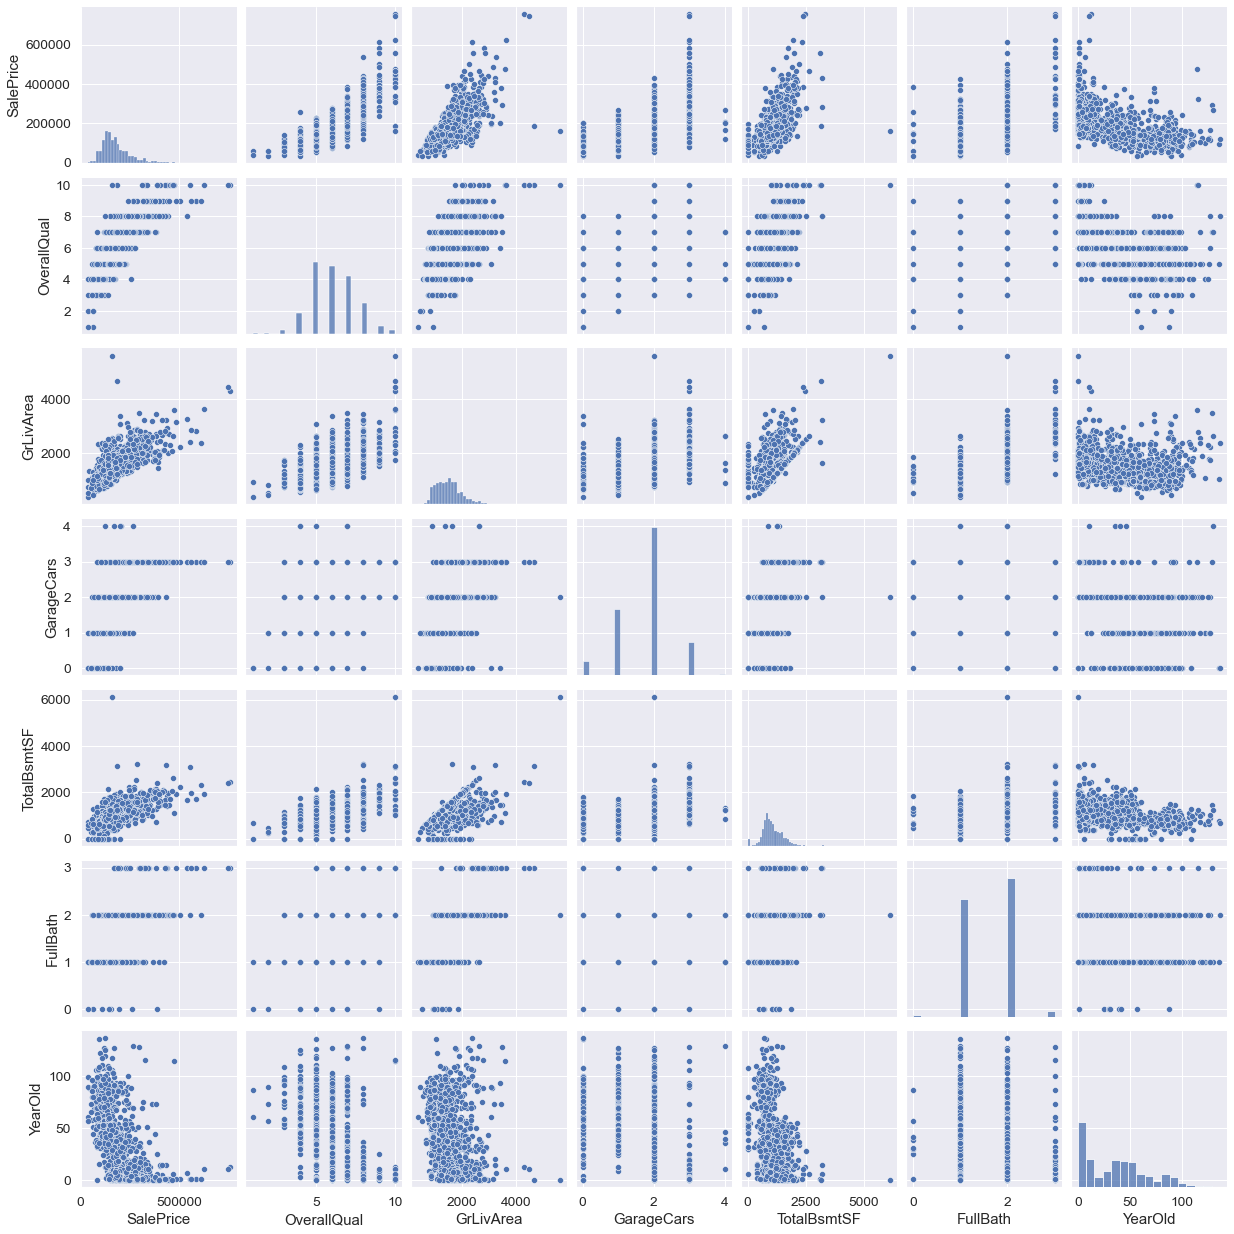

In [77]:
cols = ["SalePrice", "OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearOld"]
sns.pairplot(df[cols], size=2.5)
plt.show()

SalePrice has strong positive correlation with OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, FullBath and weak negative correlation with YearOld.

In [78]:
# Identifying numerical and categorical columns separately
types_train = df.dtypes
num_train = types_train[(types_train == 'int64') | (types_train == 'float64')]
cat_train = types_train[(types_train == 'object')]

In [79]:
num_train

Id                      int64
MSSubClass              int64
LotArea                 int64
OverallQual             int64
OverallCond             int64
MasVnrArea            float64
BsmtFinSF1              int64
BsmtFinSF2              int64
BsmtUnfSF               int64
TotalBsmtSF             int64
1stFlrSF                int64
2ndFlrSF                int64
LowQualFinSF            int64
GrLivArea               int64
BsmtFullBath            int64
BsmtHalfBath            int64
FullBath                int64
HalfBath                int64
BedroomAbvGr            int64
KitchenAbvGr            int64
TotRmsAbvGrd            int64
Fireplaces              int64
GarageCars              int64
GarageArea              int64
WoodDeckSF              int64
OpenPorchSF             int64
EnclosedPorch           int64
3SsnPorch               int64
ScreenPorch             int64
PoolArea                int64
MiscVal                 int64
SalePrice               int64
YearOld                 int64
GarageYear

In [80]:
cat_train

MSZoning         object
LotFrontage      object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
MonthSold        object
dtype: object

In [81]:
# Total number for all data types
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     40
int64      33
float64     2
Name: 0, dtype: int64

In [82]:
numerical_values_train = list(num_train.index)
numerical_values_train

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'YearOld',
 'GarageYearOld',
 'RemodellingYearOld']

In [83]:
categorical_values_train = list(cat_train.index)
categorical_values_train

['MSZoning',
 'LotFrontage',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MonthSold']

## Data Preparation

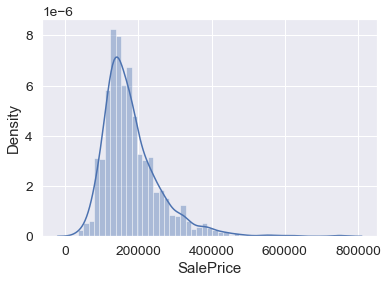

In [84]:
sns.distplot(df.SalePrice)
plt.show()

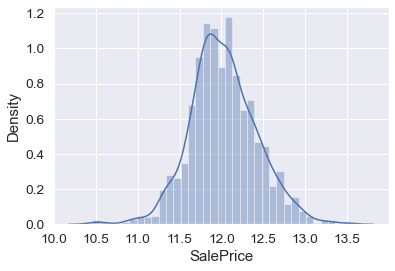

Skewness 0.12133506220520406
Kurtosis 0.8095319958036296


In [85]:
# As we have noticed earlier that the target column is skewed, we are checking the target variable distribution by transforming it into a logarithmic function

sns.distplot(np.log(df.SalePrice))
plt.show()
print("Skewness", np.log(df["SalePrice"]).skew())
print("Kurtosis", np.log(df["SalePrice"]).kurt())

Skewness value near to zero and Kurtosis value near to 3 indicates the distribution is fairly symmetrical.

In [86]:
# Saving the transformed SalePrice column
df['LogSalePrice'] = np.log(df.SalePrice)

In [87]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearOld,GarageYearOld,RemodellingYearOld,MonthSold,LogSalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,5,5.0,5,February,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31,31.0,31,May,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,7,7.0,6,September,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91,8.0,36,February,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8,8.0,8,December,12.429216


## Label Encoding 

In [88]:
# Performing Label encoding over all categorical columns

for i in categorical_values_train:
    feature_set = set(df[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df.loc[df[i] == j,i] = feature_list.index(j)
    

In [89]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearOld,GarageYearOld,RemodellingYearOld,MonthSold,LogSalePrice
0,1,60,4,36,8450,0,3,2,0,3,2,22,5,4,1,4,7,5,5,2,4,5,3,196.0,1,0,2,1,3,3,1,706,2,0,150,856,5,4,1,3,856,854,0,1710,1,0,2,1,3,1,1,8,5,0,5,0,2,548,0,0,2,0,61,0,0,0,0,0,6,5,208500,5,5.0,5,3,12.247694
1,2,20,4,51,9600,0,3,2,0,1,2,21,7,4,1,3,6,8,5,2,12,14,0,0.0,3,0,4,1,3,1,4,978,2,0,284,1262,5,4,1,3,1262,0,0,1262,0,1,2,0,3,1,3,6,5,1,5,0,2,460,0,0,2,298,0,0,0,0,0,0,6,5,181500,31,31.0,31,4,12.109011
2,3,60,4,39,11250,0,2,2,0,3,2,22,5,4,1,4,7,5,5,2,4,5,3,162.0,1,0,2,1,3,0,1,486,2,0,434,920,5,4,1,3,920,866,0,1786,1,0,2,1,3,1,1,6,5,1,5,0,2,608,0,0,2,0,42,0,0,0,0,0,6,5,223500,7,7.0,6,8,12.317167
3,4,70,4,31,9550,0,2,2,0,2,2,10,5,4,1,4,7,5,5,2,6,9,0,0.0,3,0,1,3,1,3,4,216,2,0,540,756,5,3,1,3,961,756,0,1717,1,0,1,0,3,1,1,7,5,1,1,2,3,642,0,0,2,0,35,272,0,0,0,0,6,1,140000,91,8.0,36,3,11.849398
4,5,60,4,55,14260,0,2,2,0,1,2,24,5,4,1,4,8,5,5,2,4,5,3,350.0,1,0,2,1,3,2,1,655,2,0,490,1145,5,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,1,9,5,1,5,0,3,836,0,0,2,192,84,0,0,0,0,0,6,5,250000,8,8.0,8,9,12.429216


## Test Train Split

In [90]:
X = df.drop(['Id','SalePrice','LogSalePrice'], axis=1)

In [91]:
y = df['LogSalePrice']

In [92]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [93]:
scaler = StandardScaler()

X_train[['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearOld','GarageYearOld','RemodellingYearOld','MSZoning','LotFrontage','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','MonthSold']] = scaler.fit_transform(X_train[['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearOld','GarageYearOld','RemodellingYearOld','MSZoning','LotFrontage','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','MonthSold']])
X_test[['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearOld','GarageYearOld','RemodellingYearOld','MSZoning','LotFrontage','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','MonthSold']] = scaler.transform(X_test[['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearOld','GarageYearOld','RemodellingYearOld','MSZoning','LotFrontage','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','MonthSold']])

print(X_train.head())
print(X_train.head())
   

      MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
210    -0.657071  0.449780    -0.441798 -0.473765 -0.062715  0.692628   
318     0.035976  0.449780     0.265603 -0.056845 -0.062715  0.692628   
239    -0.195040  0.449780    -0.903146 -0.169324 -0.062715  0.692628   
986    -0.195040 -1.026829    -0.687850 -0.502297 -0.062715  0.692628   
1416    3.039179 -1.026829    -0.657094  0.082905 -0.062715  0.692628   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
210      0.183567  -0.031311   0.528656   0.228471     -0.424882    0.068511   
318      2.414783  -0.031311   0.528656  -3.305904      1.594980    0.068511   
239      0.183567  -0.031311   0.528656   0.228471     -0.424882    0.068511   
986      0.183567  -0.031311  -0.670805   0.228471      0.818110    1.885382   
1416     0.183567  -0.031311   0.528656   0.228471      0.818110    0.068511   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  \
2

In [94]:
X_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,YearOld,GarageYearOld,RemodellingYearOld,MonthSold
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03
mean,-5.118878e-17,3.305659e-17,-1.238535e-16,1.034590e-16,-5.306453e-17,5.663116e-16,-1.568013e-16,-7.373849e-17,-1.402730e-17,4.963926e-17,6.709183e-17,-3.917315e-17,1.444357e-16,2.044289e-16,-1.151544e-16,1.176554e-16,1.647936e-16,3.039249e-17,-1.490265e-16,1.027989e-16,1.282574e-16,-3.153425e-18,-9.210175e-17,1.409255e-16,1.956211e-16,9.569013e-17,-1.165680e-16,-6.155703e-16,-2.592333e-16,2.985967e-16,-4.066831e-17,-2.484749e-16,2.154115e-16,1.229292e-16,4.697516e-17,-1.007628e-15,-2.189455e-16,8.699103e-17,3.044006e-17,-2.370506e-16,7.377927e-17,-2.307981e-17,1.110223e-16,1.426653e-16,1.410342e-16,-1.805064e-17,-5.054179e-16,-3.601429e-16,6.398734e-16,-2.671712e-16,-3.979840e-17,-3.099599e-16,-5.784904e-17,-6.524327e-17,-1.917065e-16,1.312477e-16,5.246647e-18,3.425272e-18,-1.498964e-16,-3.229542e-17,-1.674577e-17,-1.826812e-17,-1.339662e-16,9.936007e-17,-3.273038e-17,-1.950638e-16,-3.706090e-16,-5.887118e-16,-1.332594e-16,-1.013446e-16,5.001984e-18,-9.960473e-17,-4.295182e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00
min,-8.880864e-01,-5.456655e+00,-1.610547e+00,-8.742840e-01,-6.271472e-02,-4.334672e+00,-4.278864e+00,-3.131121e-02,-3.069728e+00,-6.840278e+00,-2.133995e+00,-4.473667e+00,-1.551649e+01,-1.627766e+00,-2.919175e+00,-3.638884e+00,-4.197642e+00,-2.046813e+00,-4.368862e+00,-1.445171e+00,-1.681686e

## Model Building

In [95]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0]}
len(params["alpha"])

12

In [96]:
# Applying Lasso
lasso = Lasso()

# Cross Validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score=True,
                       verbose = 1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [97]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033510,0.003191,0.001995,2.780415e-07,0.0001,{'alpha': 0.0001},0.859130,0.675194,0.813639,0.895583,0.904443,0.829598,0.083574,3,0.885724,0.911766,0.895088,0.879499,0.875310,0.889477,0.012982
1,0.007582,0.001200,0.002418,5.191189e-04,0.001,{'alpha': 0.001},0.863244,0.682196,0.818607,0.898804,0.905607,0.833692,0.081809,2,0.885172,0.911443,0.894546,0.878972,0.874708,0.888968,0.013068
2,0.004588,0.001017,0.001795,3.980403e-04,0.01,{'alpha': 0.01},0.878653,0.693734,0.821549,0.896720,0.893402,0.836811,0.076480,1,0.869042,0.898160,0.879833,0.863070,0.859016,0.873824,0.014044
3,0.004189,0.000399,0.001795,3.993517e-04,0.05,{'alpha': 0.05},0.823267,0.709873,0.766937,0.805296,0.802640,0.781603,0.040249,4,0.787655,0.825940,0.805015,0.788364,0.780313,0.797458,0.016377
4,0.003136,0.000440,0.001596,4.886556e-04,0.1,{'alpha': 0.1},0.708046,0.653840,0.674689,0.694202,0.688616,0.683879,0.018438,5,0.685282,0.707471,0.699154,0.692032,0.675049,0.691798,0.011160


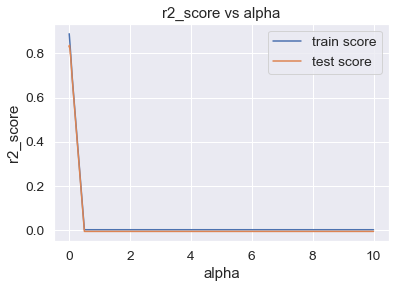

In [98]:
# Plotting mean test and train scores with alpha
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2_score')

plt.title("r2_score vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [99]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.01}
0.8368113588553594


In [100]:
# list of alphas to tune
params2 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
len(params2["alpha"])

28

In [101]:
# Applying Ridge
ridge = Ridge()

# Cross Validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params2,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score=True,
                       verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [102]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003197,0.000754,0.002197,0.000381,0.0001,{'alpha': 0.0001},0.858561,0.674385,0.812762,0.895141,0.904162,0.829002,0.083746,28,0.88573,0.911771,0.895097,0.879506,0.875317,0.889484,0.012981
1,0.003401,0.000499,0.001985,0.000013,0.001,{'alpha': 0.001},0.858561,0.674385,0.812762,0.895141,0.904162,0.829002,0.083746,27,0.88573,0.911771,0.895097,0.879506,0.875317,0.889484,0.012981
2,0.002793,0.000399,0.001197,0.000399,0.01,{'alpha': 0.01},0.858564,0.674388,0.812765,0.895141,0.904162,0.829004,0.083745,26,0.88573,0.911771,0.895097,0.879506,0.875317,0.889484,0.012981
3,0.002595,0.000478,0.001602,0.000494,0.05,{'alpha': 0.05},0.858577,0.674402,0.812779,0.895144,0.904162,0.829013,0.083741,25,0.88573,0.911771,0.895097,0.879506,0.875317,0.889484,0.012981
4,0.002573,0.000486,0.001410,0.000491,0.1,{'alpha': 0.1},0.858593,0.674420,0.812796,0.895147,0.904161,0.829023,0.083735,24,0.88573,0.911771,0.895097,0.879506,0.875317,0.889484,0.012981


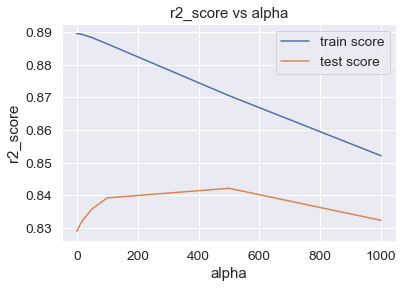

In [103]:
# Plotting mean test and train scores with alpha
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2_score')

plt.title("r2_score vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [104]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 500}
0.8421996757384811


In [105]:
# Now we got the best estimator a.k.a optimal value of alpha (Lambda), we will start preparing our final regression model 
# using regularisation and evaluate with test data

## Prediction on Test Data

In [106]:
# Linear Regression Modelling

lm = LinearRegression()
lm.fit(X_train,y_train)


rfe = RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'Neighborhood', 'Condition2', 'BldgType', 'OverallQual',
       'OverallCond', 'BsmtQual', 'TotalBsmtSF', 'CentralAir', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageType', 'GarageCars',
       'PoolArea', 'SaleType', 'SaleCondition', 'YearOld',
       'RemodellingYearOld'],
      dtype='object')

In [107]:
X_train_new = X_train[col]
X_train_new = sm.add_constant(X_train_new)

lr = sm.OLS(y_train,X_train_new)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     341.0
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:22:18   Log-Likelihood:                 545.80
No. Observations:                1021   AIC:                            -1050.
Df Residuals:                    1000   BIC:                            -946.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0222      0.004   2681.527      0.000      12.013      12.031
MSSubClass            -0.0209      0.006     -3.303      0.001      -0.033      -0.008
Neighborhood          -0.0174      0.005     -3.672      0.000      -0.027      -0.008
Condition2            -0.0172      0.005     -3.790      0.000      -0.026      -0.008
BldgType              -0.0242      0.006     -3.832      0.000      -0.037      -0.012
OverallQual            0.1026      0.008     12.800      0.000       0.087       0.118
OverallCond            0.0454      0.006      7.950      0.000       0.034       0.057
BsmtQual              -0.0202      0.007     -2.691      0.007      -0.035      -0.005
TotalBsmtSF            0.0208      0.007      3.171      0.002       0.008       0.034
CentralAir             0.0211      0.005      3.911      0.000       0.011       0.032
GrLivArea              0.1331      0.007     19.790      0.000       0.120       0.146
BsmtFullBath           0.0400      0.005      8.138      0.000       0.030       0.050
KitchenQual           -0.0192      0.007     -2.931      0.003      -0.032      -0.006
Fireplaces             0.0307      0.005      5.642      0.000       0.020       0.041
GarageType             0.0203      0.005      3.965      0.000       0.010       0.030
GarageCars             0.0566      0.006      9.136      0.000       0.044       0.069
PoolArea              -0.0264      0.005     -5.602      0.000      -0.036      -0.017
SaleType              -0.0162      0.006     -2.862      0.004      -0.027      -0.005
SaleCondition          0.0181      0.005      3.478      0.001       0.008       0.028
YearOld               -0.0738      0.009     -8.423      0.000      -0.091      -0.057
RemodellingYearOld    -0.0176      0.007     -2.582      0.010      -0.031      -0.004
==============================================================================
Omnibus:                      669.755   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27410.269
Skew:                          -2.421   Prob(JB):                         0.00
Kurtosis:                      27.917   Cond. No.                         5.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Lasso regression
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print(lasso.coef_)
print(lasso.intercept_)

[-0.01019948  0.01521923  0.00816998  0.00948827 -0.0002341  -0.
  0.         -0.         -0.         -0.00044871 -0.00213562  0.
 -0.00566525 -0.00840728 -0.          0.11431758  0.02643681 -0.
  0.          0.          0.          0.          0.         -0.00282302
 -0.          0.         -0.01514066  0.         -0.00484549  0.
  0.00354841 -0.          0.         -0.          0.01717433 -0.
  0.00852983  0.01718822 -0.          0.00572929  0.         -0.
  0.0999045   0.02678086  0.          0.00708702  0.          0.
 -0.00213806 -0.01529438  0.00792303  0.          0.02482383  0.00939934
 -0.00430924  0.04594582  0.00494116 -0.         -0.          0.
  0.00865255  0.         -0.          0.          0.00464073 -0.01409038
 -0.         -0.00387673  0.         -0.0490587  -0.         -0.02275159
  0.        ]
12.022188172224935


In [109]:
# Predicting R2 score value of train and test set
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [110]:
r2_train_lasso = r2_score(y_train, y_pred_train)
r2_test_lasso = r2_score(y_test, y_pred_test)

print("r2_train_lasso:",r2_train_lasso)
print("r2_test_lasso:",r2_test_lasso)

r2_train_lasso: 0.869457364811399
r2_test_lasso: 0.865997423971727


In [111]:
print ('RMSE is: \n', mean_squared_error(y_test, y_pred_test))

RMSE is: 
 0.02204879947474558


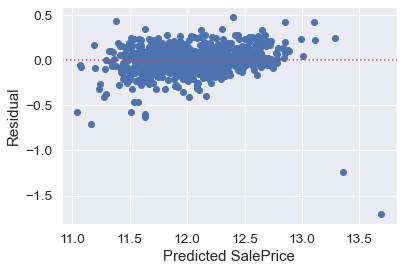

In [112]:
# Residual variance check (Homoscedasticity)

residual = y_train - y_pred_train

plt.scatter(y_pred_train, residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual")
plt.show()


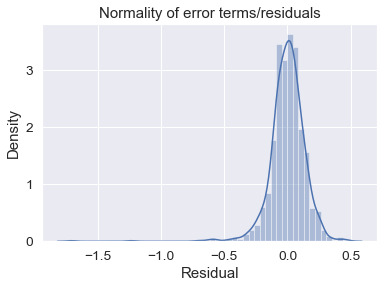

In [113]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title("Normality of error terms/residuals")
plt.xlabel("Residual")
plt.show()

In [114]:
# Ridge regression
ridge=Ridge(alpha=500)
ridge.fit(X_train,y_train)
print(ridge.coef_)
print(ridge.intercept_)

[-0.00898633  0.01343491  0.00922462  0.01165206 -0.00762829 -0.00114993
  0.00250002 -0.00476656 -0.00576894 -0.00546493 -0.01010441 -0.00254767
 -0.00976645 -0.00957918  0.0026319   0.0569905   0.02296676 -0.00748513
  0.00124927  0.00018514  0.00275069  0.0035324   0.01067643 -0.02046839
 -0.00308619 -0.00070618 -0.02413921  0.00028402 -0.01080729 -0.00297201
  0.01448808 -0.00291611  0.00494538  0.0033406   0.01977567 -0.00108828
  0.01336136  0.01908525 -0.00100248  0.02581487  0.01989829  0.00140876
  0.03572098  0.02048691  0.00371586  0.02264358  0.01432791  0.0109317
 -0.01270588 -0.02297377  0.02371232  0.00661723  0.02554173  0.011916
 -0.01221411  0.02985733  0.02278009  0.00265345 -0.00475581  0.00601383
  0.01339881  0.00185206  0.00104672  0.00465029  0.01069097 -0.01335088
 -0.00239264 -0.01266581  0.00923653 -0.02403824 -0.00574862 -0.02321321
  0.00430122]
12.022188172224935


In [115]:
# Predicting R2 score value of train and test set
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [116]:
r2_train_ridge = r2_score(y_train, y_pred_train)
r2_test_ridge = r2_score(y_test, y_pred_test)

print("r2_train_ridge:",r2_train_ridge)
print("r2_test_ridge:",r2_test_ridge)

r2_train_ridge: 0.8705875196661372
r2_test_ridge: 0.866612970182793


In [117]:
print ('RMSE is: \n', mean_squared_error(y_test, y_pred_test))

RMSE is: 
 0.021947517429448386


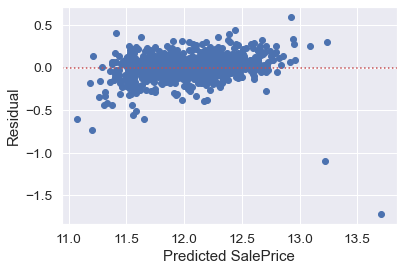

In [118]:
# Residual variance check (Homoscedasticity)

residual = y_train - y_pred_train

plt.scatter(y_pred_train, residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual")
plt.show()


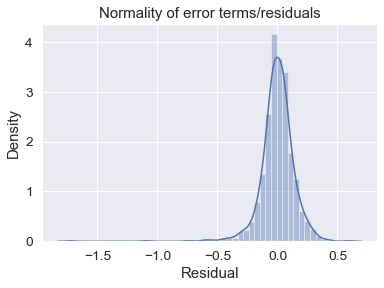

In [119]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title("Normality of error terms/residuals")
plt.xlabel("Residual")
plt.show()

In [120]:
# Storing feature coeffs for feature importance derivation
betas = pd.DataFrame(index=X_train.columns)
print(betas)

Empty DataFrame
Columns: []
Index: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SaleType, SaleCondition, YearOld, GarageYearOld, RemodellingYearOld, MonthSold]


In [121]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [122]:
betas.sort_values(by='Lasso',ascending=False)

,Ridge,Lasso
OverallQual,0.056990,0.114318
GrLivArea,0.035721,0.099904
GarageCars,0.029857,0.045946
BsmtFullBath,0.020487,0.026781
OverallCond,0.022967,0.026437
Fireplaces,0.025542,0.024824
CentralAir,0.019085,0.017188
TotalBsmtSF,0.019776,0.017174
MSZoning,0.013435,0.015219
LotArea,0.011652,0.009488


In [123]:
# Top 10 important predictors as per Lasso
betas.sort_values(by='Lasso', ascending = False).index[:10].to_list()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'BsmtFullBath',
 'OverallCond',
 'Fireplaces',
 'CentralAir',
 'TotalBsmtSF',
 'MSZoning',
 'LotArea']

In [124]:
# Top 10 important predictors as per Ridge
betas.sort_values(by='Ridge', ascending = False).index[:10].to_list()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 '1stFlrSF',
 'Fireplaces',
 'TotRmsAbvGrd',
 'OverallCond',
 'GarageArea',
 'FullBath',
 'BsmtFullBath']

## Subjective Question

**Question 1**

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

The optimal value of alpha for ridge regression is 500 and for lasso regression is 0.01

In [125]:
# Choosing double the value of alpha i.e. alpha = 0.02

# Lasso regression
lasso=Lasso(alpha=0.02)
lasso.fit(X_train,y_train)
print(lasso.coef_)
print(lasso.intercept_)

# Predicting R2 score value of train and test set
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_pred_train)
r2_test_lasso = r2_score(y_test, y_pred_test)

print("r2_train_lasso:",r2_train_lasso)
print("r2_test_lasso:",r2_test_lasso)

print ('RMSE is: \n', mean_squared_error(y_test, y_pred_test))

[-0.00177531  0.01454255  0.00688654  0.00504341 -0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.00581668 -0.          0.12115088  0.01034233 -0.
  0.          0.          0.          0.          0.         -0.
  0.          0.         -0.01452229  0.         -0.00043261  0.
  0.         -0.          0.         -0.          0.01831329  0.
  0.004839    0.01745728 -0.          0.01086071  0.         -0.
  0.09437213  0.01939641  0.          0.00094704  0.          0.
 -0.         -0.01486866  0.00202336  0.          0.02502399  0.00381458
 -0.00370226  0.04185476  0.00808893 -0.         -0.          0.
  0.00611463  0.         -0.          0.          0.         -0.00210588
 -0.         -0.          0.         -0.03956353 -0.         -0.02750947
  0.        ]
12.022188172224935
r2_train_lasso: 0.8498372060576479
r2_test_lasso: 0.8499734991000553
RMSE is: 
 0.024685377940366515


After doubling the alpha for lasso reg, the r2_score dropped by 0.015 and RMSE increased by 0.002

In [126]:
# Choosing double the value of alpha i.e. alpha = 1000

# Ridge regression
ridge=Ridge(alpha=1000)
ridge.fit(X_train,y_train)
print(ridge.coef_)
print(ridge.intercept_)

# Predicting R2 score value of train and test set
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_ridge = r2_score(y_train, y_pred_train)
r2_test_ridge = r2_score(y_test, y_pred_test)

print("r2_train_ridge:",r2_train_ridge)
print("r2_test_ridge:",r2_test_ridge)

print ('RMSE is: \n', mean_squared_error(y_test, y_pred_test))

[-7.02000954e-03  1.25693576e-02  9.44009335e-03  1.12535678e-02
 -6.08494257e-03 -3.79205797e-03  1.60271797e-03 -3.68409110e-03
 -5.43989319e-03 -4.20170502e-03 -7.81660463e-03 -1.52911055e-03
 -7.19138611e-03 -8.00963458e-03  2.32963089e-03  4.54421815e-02
  1.64896812e-02 -7.31394846e-03  1.03524920e-03  1.64589808e-04
  4.03148420e-04  5.86773408e-03  1.13456825e-02 -2.07825214e-02
 -1.84319176e-03 -2.55443803e-03 -2.25300453e-02  2.29341725e-04
 -1.08541645e-02 -3.72665225e-03  1.44276880e-02 -1.57022204e-03
  4.28824906e-03  4.26161321e-03  2.03699980e-02  8.36404303e-04
  1.38790319e-02  1.78137526e-02 -7.79968052e-04  2.37047512e-02
  1.72771248e-02 -7.92356301e-05  3.18628906e-02  1.61573177e-02
  2.68796528e-03  2.13722726e-02  1.38065861e-02  1.00432797e-02
 -1.09270298e-02 -2.27616002e-02  2.25597247e-02  5.37253392e-03
  2.43472171e-02  1.02650225e-02 -1.33651712e-02  2.68573709e-02
  2.30682690e-02  1.95139705e-03 -4.40170675e-03  6.60648193e-03
  1.32825146e-02  4.56640

After doubling the alpha for ridge reg, the r2_score dropped by 0.015 and RMSE increased by 0.002

In [127]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_



['OverallQual',
 'GrLivArea',
 'GarageCars',
 'Fireplaces',
 '1stFlrSF',
 'GarageArea',
 'TotRmsAbvGrd',
 'FullBath',
 'TotalBsmtSF',
 'CentralAir']

In [128]:
# Top 10 important predictors as per Lasso after implementing the change
betas.sort_values(by='Lasso', ascending = False).index[:10].to_list()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'Fireplaces',
 'BsmtFullBath',
 'TotalBsmtSF',
 'CentralAir',
 'MSZoning',
 '1stFlrSF',
 'OverallCond']

In [129]:
# Top 10 important predictors as per Ridge after implementing the change
betas.sort_values(by='Ridge', ascending = False).index[:10].to_list()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'Fireplaces',
 '1stFlrSF',
 'GarageArea',
 'TotRmsAbvGrd',
 'FullBath',
 'TotalBsmtSF',
 'CentralAir']

**Question 2**

**You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?**

Both ridge and lasso reg model are giving similar results but I will choose lasso regression model as lasso helped to shrink the beta coefficients to zero for some predictors i.e. it removed some of the features and make the model simpler and interpretable.

**Question 3**

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

Fireplaces, CentralAir, TotalBsmtSF, MSZoning, LotArea will be the next five most important predictor variables.

**Question 4**

**How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?**

Our model is not overfitting and the model is simple and interpretable which means the model is robust and generalisable. From model evaluation, we can see r2_score of both train and test data are almost nearly equal (r2_train_lasso: 0.869,
r2_test_lasso: 0.865). So the model has enough accuracy maintaining the bias variance tradeoff.